## `01` - Bibliotecas

In [57]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
#import scipy.stats as stats
import warnings
import pickle

from sklearn.preprocessing import LabelEncoder

from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn import preprocessing
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix
warnings.filterwarnings("ignore")

## `02` - Importação dos dados e análise descritiva

### `02.01` - Importação dos dados e dicionário de dados

- `HeartDisease....:` Alguma vez reportou doença arterial coronariana ou  infecção do miocárdio
- `BMI.............:` IMC
- `Smoking.........:` Fumou pelo menos 100 cigarros ao longo da vida (NOTA: 100 cigarros = 5 maços)
- `AlcoholDrinking.:` #Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- `Stroke..........:` (Ever told) (you had) a stroke?
- `PhysicalHealth..:` Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)
- `MentalHealth....:` Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)
- `DiffWalking.....:` Do you have serious difficulty walking or climbing stairs?
- `Sex.............:` Are you male or female?
- `AgeCategory.....:` Fourteen-level age category
- `Race............:` Imputed race/ethnicity value
- `Diabetic........:` (Ever told) (you had) diabetes?
- `PhysicalActivity:` Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- `GenHealth.......:` Would you say that in general your health is...
- `SleepTime.......:` On average, how many hours of sleep do you get in a 24-hour period?
- `Asthma..........:` (Ever told) (you had) asthma?
- `KidneyDisease...:` Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- `SkinCancer......:` (Ever told) (you had) skin cancer?

In [58]:
dados = pd.read_csv(
    'heart_2020_cleaned.csv', 
    sep = ',', 
    skipinitialspace = True
)

Tradução do nome das colunas para melhorar visualização dos dados

In [59]:
dados.rename(
    columns={
        'HeartDisease'     : 'problema_coracao',
        'BMI'              : 'imc',
        'Smoking'          : 'fumante',
        'AlcoholDrinking'  : 'consume_alcool',
        'Stroke'           : 'derrame',
        'PhysicalHealth'   : 'dias_com_problemas_fisicos',
        'MentalHealth'     : 'dias_com_problemas_mentais',
        'DiffWalking'      : 'dificuldade_andar',
        'Sex'              : 'genero',
        'AgeCategory'      : 'faixa_etaria',
        'Race'             :'raca',
        'Diabetic'         : 'diabetes',
        'PhysicalActivity' : 'pratica_exercicio',
        'GenHealth'        : 'saude_geral',
        'SleepTime'        : 'horas_de_sono',
        'Asthma'           : 'asma',
        'KidneyDisease'    : 'problemas_nos_rins',
        'SkinCancer'       : 'cancer_pele'
    }, 
    inplace=True
)

### `02.02` - Análise descritiva

##### `02.02.01` - Verificação de dados nulos (que podem impactar na análise)

Felizmente nossa base não possui dados nulos, caso encontrássemos alguma coluna com informações em branco poderíamos seguir por dois caminhos:
 
 1 - `remover a linha`: neste caso removemos toda a linha que apresenta um ou mais informações em branco, para que ela não comprometa a análise dos dados
 
 2 - `preencher a coluna com a média das outras linhas`: esta opção pode ser interessante quando a informação ausente é numérica e pode ser calculada com base nas demais informações existentes. Para dados categóricos qualquer informação colocada preenchida pode ser considerada uma ponderação arbitrária o que pode impactar no resultado final.

In [60]:
dados.isna().sum()

problema_coracao              0
imc                           0
fumante                       0
consume_alcool                0
derrame                       0
dias_com_problemas_fisicos    0
dias_com_problemas_mentais    0
dificuldade_andar             0
genero                        0
faixa_etaria                  0
raca                          0
diabetes                      0
pratica_exercicio             0
saude_geral                   0
horas_de_sono                 0
asma                          0
problemas_nos_rins            0
cancer_pele                   0
dtype: int64

#### `02.02.02` - Verificação dos tipos de dados

Nossa base de dados possui diversas colunas categóricas, aqui exibidas com o tipo object. Faremos o tratamento necessário á seguir.

In [61]:
dados.dtypes

problema_coracao               object
imc                           float64
fumante                        object
consume_alcool                 object
derrame                        object
dias_com_problemas_fisicos    float64
dias_com_problemas_mentais    float64
dificuldade_andar              object
genero                         object
faixa_etaria                   object
raca                           object
diabetes                       object
pratica_exercicio              object
saude_geral                    object
horas_de_sono                 float64
asma                           object
problemas_nos_rins             object
cancer_pele                    object
dtype: object

#### `02.02.03` - Resumo dos dados (head)

In [62]:
dados.head()

,problema_coracao,imc,fumante,consume_alcool,derrame,dias_com_problemas_fisicos,dias_com_problemas_mentais,dificuldade_andar,genero,faixa_etaria,raca,diabetes,pratica_exercicio,saude_geral,horas_de_sono,asma,problemas_nos_rins,cancer_pele
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


#### `02.02.04` - Visualização do impacto de algumas variáveis preditoras sobre registros de problema no coração (variável resposta)

In [63]:
grafico = px.treemap(
    dados, 
    path=['problema_coracao', 'faixa_etaria']
)

grafico.show()

del(grafico)

In [64]:
grafico = px.treemap(
    dados, 
    path=['problema_coracao', 'fumante', 'consume_alcool'])

grafico.show()

del(grafico)

## `03` - Preparação dos dados

Uma vez que os dados foram carregados faremos a preparação e separação das variáveis (colunas de nossa tabela) e os tratamentos necessários.

### `03.01` - Separação de variáveis preditoras e resposta

 - `preditoras (x)`: utilizadas para treinar os modelos
 - `resposta (y)`: valor que desejamos encontrar (prever). Para que possa ser utilizada nos modelos à seguir eu utilizei a classe LabelEncoder para transformar o Yes e No da coluna em 0 e 1. Na próxima etapa eu abordarei com um pouco mais de detalhes esta transformação

In [65]:
x_dados = pd.DataFrame(dados[dados.columns[~dados.columns.isin(['problema_coracao'])]])
y_dados = pd.DataFrame(dados.problema_coracao)

label_encoder = LabelEncoder()
y_dados['problema_coracao_encoded'] = label_encoder.fit_transform(y_dados['problema_coracao'])
y_dados = y_dados.drop('problema_coracao', axis=1)

del(label_encoder)


Em alguns casos, variáveis categóricas (qualitativas) precisam ser convertidas em uma sequência numérica, este processo é chamado de **label encoding**.

Em Python as variáveis categóricas possuem o tipo `object` (ou `series`) e vamos utilizar isso ao nosso favor, criando um processo automatizado que criará em um novo dataframe, chamado `x_dados_encoded` novas coluna para cada varável categórica com sua respectiva sequência numérica, utilizando a classe `LabelEncoder`.

In [66]:
x_dados_encoded = x_dados.assign()

#será feito um loop para percorrer todas as colunas do dataframe x_dados_encoded
for column in x_dados_encoded:
    #se a coluna for do tipo object
    if x_dados_encoded[column].dtype == object:
        #é criado um objeto LabelEncoder
        label_encoder = LabelEncoder()
        #utilizando o objeto criado anteriormente é feita a sequencia numérica e adicionada em uma nova coluna
        #com a estrutura "nome original" + "_encoded"
        x_dados_encoded[str(column) + '_encoded'] = label_encoder.fit_transform(x_dados_encoded[column])


del(label_encoder)
del(column)

Os dados das variáveis X e Y serão salvos no arquivo `dados.pkl` para que possam ser utilizado nos modelos à seguir sem a necessidade de novo carregamento e transformação

In [67]:
import pickle

with open('dados.pkl', mode = 'wb') as f:
  pickle.dump([x_dados, x_dados_encoded, y_dados], f)

del(f)

Por fim faremos a criação de dois métodos que farão o tratamento dos dados, separação das informações para treino e teste

 - `get_dados_variaveis_encoded:` retornas as variáveis numéricas e as variáveis categóricas transformadas em sequência numérica, com o sufixo _encoded. Esta função possui um parâmetro chamado `padronizar` para indicar se os números devem ou não ser colocados em uma escala única, dependendo do modelo executado a padronização pode ajudar a melhorar a acuracidade
 - `get_dados..................:` retorna apenas as variáveis originais 

In [68]:
def get_dados_variaveis_encoded(padronizar = False):
    # abertura dos arquivo com os dados de X e Y
    with open('dados.pkl', 'rb') as f:
        x_dados, x_dados_encoded, y_dados = pickle.load(f)

    # seleção das colunas que permanecerão no datafrane, neste caso as numéricas e categóricas transformadas
    names = ['imc','dias_com_problemas_fisicos','dias_com_problemas_mentais','horas_de_sono','fumante_encoded','consume_alcool_encoded','derrame_encoded','dificuldade_andar_encoded','genero_encoded','faixa_etaria_encoded','raca_encoded','diabetes_encoded','pratica_exercicio_encoded','saude_geral_encoded','asma_encoded','problemas_nos_rins_encoded', 'cancer_pele_encoded']
    x_dados_encoded = x_dados_encoded[names]

    #  A padronização dos dados iguala o range de valores em todas as variáveis numéricas da base
    if padronizar == True:
        scaler = StandardScaler()
        #a padronização dos dados é feita apenas com as colunas numéricas
        x_dados_encoded = scaler.fit_transform(x_dados_encoded)

    return train_test_split(x_dados_encoded, y_dados, test_size = 0.25, random_state = 0)

In [69]:
def get_dados():
    # abertura dos arquivo com os dados de X e Y
    with open('dados.pkl', 'rb') as f:
        x_dados, x_dados_encoded, y_dados = pickle.load(f)

    return train_test_split(x_dados, y_dados, test_size = 0.25, random_state = 0)

## `04` - Comparação dos modelos

Uma vez que temos os dados prontos, podemos iniciar a comparação entre os 4 modelos que iremos comparar. Não abordarei os modelos aqui, mas deixarei outros textos que escrevi mais sobre a maioria deles, utilizando a linguagem R.

 - GLM (Modelo Linear) - https://medium.com/@marcosmhs/modelo-de-regress%C3%A3o-multin%C3%ADvel-1dd11ea369e2
 - Árvore de decisão - https://medium.com/@marcosmhs/random-forests-101-com-r-d5c1821dc445
 - Random Forests - https://medium.com/@marcosmhs/random-forests-101-com-r-d5c1821dc445
 - Redes Neurais - https://rpubs.com/marcosmhs/rede_lstm_predicao_dolar

 

Para acompanhar a performance de cada modelo preditivo utilizarei uma função que registrará a acurácia de cada um e os mostrará lado a lado

In [70]:
df_scores =  pd.DataFrame(columns=['modelo', 'score'])

def control_scores(modelo, score, just_show = False, numeric_order=True):
    if just_show == False:
        df_scores.drop(df_scores[(df_scores['modelo'] == modelo)].index, inplace=True)
        globals()['df_scores'] =  pd.DataFrame(globals()['df_scores']).append({'modelo':modelo, 'score':score }, ignore_index=True)

    fig = px.bar(
        df_scores.sort_values(by=['score'], ascending=False), 
        x="score", 
        y="modelo", 
        color='modelo', 
        orientation='h',
        text_auto=True,
        title='Resultado dos modelos (quanto maior melhor)')
    fig.show()

Para verificarmos a matriz de confusão, gráfico que indica se o modelo acertou mais do que errou, utilizaremos a função abaixo.

In [71]:
def matriz_confusao(model, x_train, y_train, x_test, y_test):
    cm = ConfusionMatrix(model)
    cm.fit(x_train, y_train)
    return cm.score(x_test, y_test)

### `04.01` - GLM (Binomial)

In [72]:
x_dados_treino, x_dados_teste, y_dados_treino, y_dados_teste = get_dados_variaveis_encoded(padronizar=True)

In [73]:
import statsmodels.api as sm

type(x_dados_treino)

modelo = sm.GLM(
    endog= y_dados_treino,
    exog = x_dados_treino,
    family= sm.families.Binomial()
)

resultados = modelo.fit()

previsoes = resultados.predict(x_dados_teste)

control_scores("GLM Binomial", accuracy_score(y_dados_teste, np.where(previsoes > 0.80, 1, 0)))


Matriz de confusão.

Para o modelo de regressão não é possível criarmos uma matriz de confusão, dado que ele gera a probabilidade de acerto e não o resultado em si

### `04.02` - Decision Tree (árvore de decisão)

In [74]:
x_dados_treino, x_dados_teste, y_dados_treino, y_dados_teste = get_dados_variaveis_encoded()

In [75]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(
    criterion='entropy', 
    random_state=0
)

modelo.fit(x_dados_treino, y_dados_treino)

previsoes = modelo.predict(x_dados_teste)

control_scores('Árvore de decisão', accuracy_score(y_dados_teste, previsoes))

0.8673904614191547

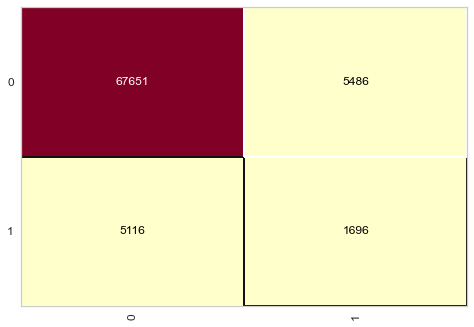

In [76]:
#Matriz de confusão.
matriz_confusao(modelo, x_dados_treino, y_dados_treino, x_dados_teste, y_dados_teste)

### `04.03` - Random Forest (floresta aleatória)

In [77]:
x_dados_treino, x_dados_teste, y_dados_treino, y_dados_teste = get_dados_variaveis_encoded(padronizar=True)

In [78]:
from sklearn.ensemble import RandomForestClassifier 

modelo = RandomForestClassifier(
    n_estimators= 50, 
    criterion='entropy', 
    random_state = 0
)

modelo.fit(x_dados_treino, y_dados_treino)

previsoes = modelo.predict(x_dados_teste)

control_scores('Random Forests - Variáveis Categóricas', accuracy_score(y_dados_teste, previsoes))

0.8741572752629801

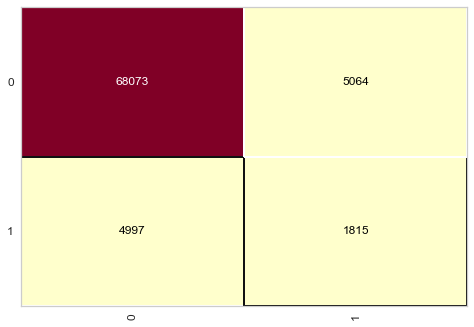

In [79]:
#Matriz de confusão.
matriz_confusao(modelo, x_dados_treino, y_dados_treino, x_dados_teste, y_dados_teste)

### `04.04` - Neural Network (rede neural)

In [80]:
x_dados_treino, x_dados_teste, y_dados_treino, y_dados_teste = get_dados_variaveis_encoded(padronizar=True)

In [81]:
from sklearn.neural_network import MLPClassifier

modelo = MLPClassifier(
    max_iter=100, 
    verbose=False, 
    tol=0.0000100,
    solver = 'adam', 
    activation = 'relu',
    hidden_layer_sizes = (55,35,15))
    
modelo.fit(x_dados_treino, y_dados_treino)

previsoes = modelo.predict(x_dados_teste)

control_scores('Rede neural', accuracy_score(y_dados_teste, previsoes))

0.8741572752629801

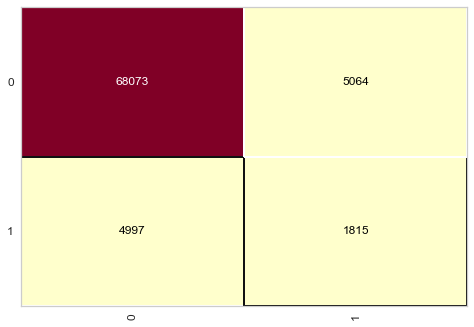

In [82]:
#Matriz de confusão.
matriz_confusao(modelo, x_dados_treino, y_dados_treino, x_dados_teste, y_dados_teste)

## `05` - Conclusões

Esta base de dados é um bom exemplo para nos lembrar que nem sempre precisamos criar algoritmos complexos para a criação dos melhores modelos preditivos. É muito comum ouvir de analistas e cientistas de dados que as redes neurais ou random forests são os métodos ideais para a criação de modelos preditivos, porém neste caso o GLM, modelo simples de regressão, apresentou a melhor acurácia.

In [83]:
control_scores('', 0, True)

O objetivo aqui não é desmerecer ou rebaixar as redes neurais, muito pelo contrário! Este tipo de algoritmo tem apresentado resultado incríveis que modelos de regressão não são capazes de alcançar como reconhecimento de imagens, por exemplo.

Por fim, e para reforçar o que foi dito anteriormente, o objetivo deste texto não é detalhar e explicar o funcionamento de cada modelo mas sim exercitar meus conhecimentos me Python.

`Um abraço! E até a próxima`

`Marcos Silva.` 